### Deliverable 1: Preprocessing the Data for a Neural Network

In [45]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [46]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df.shape

(34299, 10)

In [47]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique(dropna = True)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [49]:
application_df = application_df.loc[application_df['STATUS'] != 0]

In [50]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

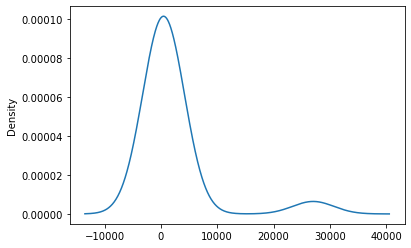

In [51]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
import matplotlib.pyplot as plot
application_counts.plot.density()

In [52]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27032
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [53]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
         ...  
C2190        1
C8210        1
C5200        1
C1900        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64

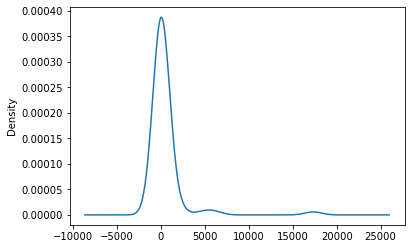

In [54]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
import matplotlib.pyplot as plot
classification_counts.plot.density()

In [55]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1882
Name: CLASSIFICATION, dtype: int64

In [56]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']
application_df[application_cat]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,T5,Independent,C3000,ProductDev,Association,0,N


In [57]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
list(encode_df.columns)

['APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',

In [58]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
encode_df = encode_df.merge(application_df, left_index=True,right_index=True,suffixes=(False, False)).drop(application_cat, axis=1)
#  YOUR CODE GOES HERE
list(encode_df.columns)

['APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',

In [59]:
df = encode_df[['STATUS','ASK_AMT','IS_SUCCESSFUL','APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',
 'SPECIAL_CONSIDERATIONS_Y']]
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL"],1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [61]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [70]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
len(X_train.columns)
number_input_features = len(X_train.columns)
number_hidden_nodes = number_input_features * 3
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 52

nn.add(
    tf.keras.layers.Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 129)               5676      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 130       
Total params: 5,806
Trainable params: 5,806
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt3/",exist_ok=True)
checkpoint_path = "checkpoints_opt3/weights.{epoch:02d}.hdf5"

In [72]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000)

In [74]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 726us/step - loss: 37553.8672 - accuracy: 0.4902
Epoch 2/100
804/804 [==============================] - 1s 726us/step - loss: 35981.1016 - accuracy: 0.4892
Epoch 3/100
804/804 [==============================] - 1s 685us/step - loss: 51928.2344 - accuracy: 0.4890
Epoch 4/100
804/804 [==============================] - 1s 703us/step - loss: 13985.1299 - accuracy: 0.4963
Epoch 5/100
804/804 [==============================] - 1s 683us/step - loss: 23486.5859 - accuracy: 0.4927
Epoch 6/100
804/804 [==============================] - 1s 692us/step - loss: 41133.3164 - accuracy: 0.5001
Epoch 7/100
139/804 [====>.........................] - ETA: 0s - loss: 3928.4048 - accuracy: 0.4908
Epoch 00007: saving model to checkpoints_opt3/weights.07.hdf5
804/804 [==============================] - 1s 706us/step - loss: 49651.5078 - accuracy: 0.4882
Epoch 8/100
804/804 [==============================] - 1s 692us/step - loss: 16019.6016 - accuracy: 0

804/804 [==============================] - 1s 746us/step - loss: 0.6918 - accuracy: 0.5320
Epoch 64/100
804/804 [==============================] - 1s 728us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 65/100
804/804 [==============================] - 1s 765us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 66/100
804/804 [==============================] - 1s 778us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 67/100
804/804 [==============================] - 1s 748us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 68/100
804/804 [==============================] - 1s 755us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 69/100
274/804 [=========>....................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 00069: saving model to checkpoints_opt3/weights.69.hdf5
804/804 [==============================] - 1s 766us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 70/100
804/804 [==============================] - 1s 724us/step - loss: 0.6911 - accuracy: 0.5320
Epoch 71/100
804/804 [============

In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7853 - accuracy: 0.5433
Loss: 0.7852626442909241, Accuracy: 0.5433337092399597


In [38]:
nn.save("trained_attrition_opt3.h5")